<a href="https://colab.research.google.com/github/RehaanSayyad/Aadhaar_Biometric-_Update_Dataset/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- STARTING DATA PIPELINE ---
Loading api_data_aadhar_biometric_0_500000.csv...
Loading api_data_aadhar_biometric_500000_1000000.csv...
Loading api_data_aadhar_biometric_1000000_1500000.csv...
Loading api_data_aadhar_biometric_1500000_1861108.csv...
SUCCESS: Merged Dataset contains 1861108 rows.

--- CRITICAL ALERT: TOP 10 DISTRICTS NEGLECTING CHILD UPDATES ---
              state       district  Child_Compliance_Ratio
543     Maharashtra    Nandurbar *                0.972644
718          Punjab     Nawanshahr                4.273096
529     Maharashtra      Gondiya *                4.758523
217           Delhi     North East                5.132990
518     Maharashtra            Bid                5.438738
693     Pondicherry       Karaikal                5.854372
29   Andhra Pradesh  Mahabub Nagar                5.934161
229         Gujarat      Ahmadabad                6.108915
482  Madhya Pradesh        Mauganj                7.822809
519     Maharashtra        Buldana           

/tmp/ipython-input-1057787585.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=red_zones, x='Child_Compliance_Ratio', y='district', palette='Reds_r')



Visualization saved as 'red_zone_analysis.png'


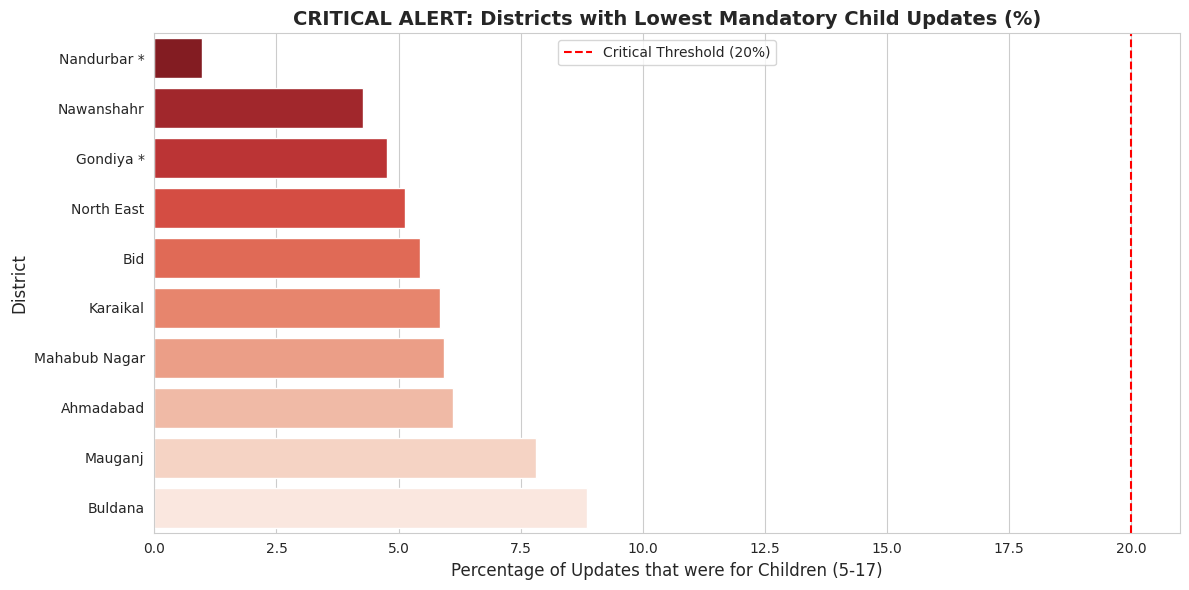

Visualization saved as 'trend_analysis.png'


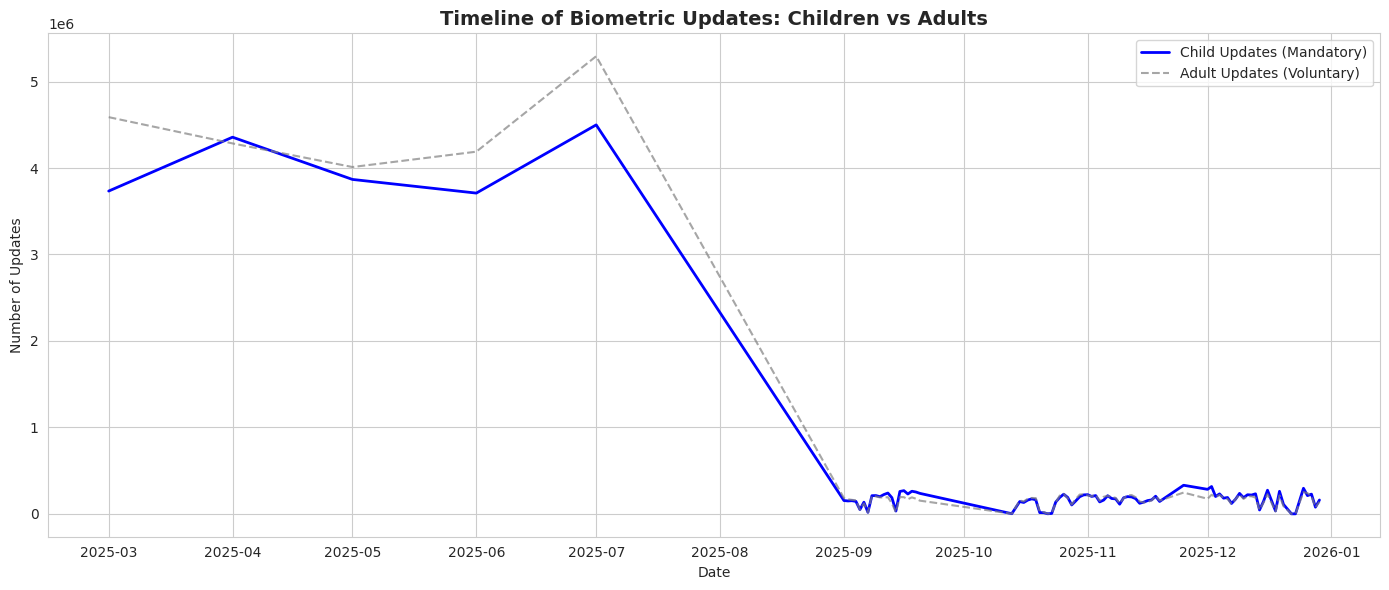

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# PHASE 1: DATA INGESTION (Technical Rigour)
# ==========================================
print("--- STARTING DATA PIPELINE ---")

# List of all 4 files provided
file_list = [
    'api_data_aadhar_biometric_0_500000.csv',
    'api_data_aadhar_biometric_500000_1000000.csv',
    'api_data_aadhar_biometric_1000000_1500000.csv',
    'api_data_aadhar_biometric_1500000_1861108.csv'
]

# Merging them into a 'Single Source of Truth'
df_list = []
for file in file_list:
    print(f"Loading {file}...")
    temp_df = pd.read_csv(file)
    df_list.append(temp_df)

df = pd.concat(df_list, ignore_index=True)
print(f"SUCCESS: Merged Dataset contains {len(df)} rows.")

# ==========================================
# PHASE 2: DATA CLEANING & STANDARDIZATION
# ==========================================
# Converting 'date' to datetime objects for Time-Series Analysis
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

# Standardizing text columns (removing spaces, title case)
df['state'] = df['state'].str.strip().str.title()
df['district'] = df['district'].str.strip().str.title()

# ==========================================
# PHASE 3: ADVANCED ANALYSIS (The Insights)
# ==========================================

# Insight 1: Calculate "Mandatory Compliance Ratio" per District
# Logic: If 'bio_age_5_17' is low compared to total updates, children are being neglected.
district_group = df.groupby(['state', 'district'])[['bio_age_5_17', 'bio_age_17_']].sum().reset_index()
district_group['Total_Updates'] = district_group['bio_age_5_17'] + district_group['bio_age_17_']
district_group['Child_Compliance_Ratio'] = (district_group['bio_age_5_17'] / district_group['Total_Updates']) * 100

# Finding the "RED ZONES" (Districts with dangerously low child updates)
# We filter for districts with significant activity (>1000 updates) to avoid outliers
red_zones = district_group[district_group['Total_Updates'] > 1000].sort_values(by='Child_Compliance_Ratio').head(10)

print("\n--- CRITICAL ALERT: TOP 10 DISTRICTS NEGLECTING CHILD UPDATES ---")
print(red_zones[['state', 'district', 'Child_Compliance_Ratio']])

# ==========================================
# PHASE 4: VISUALIZATION (Impact)
# ==========================================
# Setting the style for professional reports
sns.set_style("whitegrid")

# Plot 1: The "Red Zone" Bar Chart
plt.figure(figsize=(12, 6))
barplot = sns.barplot(data=red_zones, x='Child_Compliance_Ratio', y='district', palette='Reds_r')
plt.title('CRITICAL ALERT: Districts with Lowest Mandatory Child Updates (%)', fontsize=14, fontweight='bold')
plt.xlabel('Percentage of Updates that were for Children (5-17)', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.axvline(x=20, color='red', linestyle='--', label='Critical Threshold (20%)') # Adding a benchmark line
plt.legend()
plt.tight_layout()
plt.savefig('red_zone_analysis.png') # Saves the image for your report
print("\nVisualization saved as 'red_zone_analysis.png'")
plt.show()

# Plot 2: Time Trend Analysis (Are updates improving?)
time_trend = df.groupby('date')[['bio_age_5_17', 'bio_age_17_']].sum().reset_index()
plt.figure(figsize=(14, 6))
plt.plot(time_trend['date'], time_trend['bio_age_5_17'], label='Child Updates (Mandatory)', color='blue', linewidth=2)
plt.plot(time_trend['date'], time_trend['bio_age_17_'], label='Adult Updates (Voluntary)', color='grey', linestyle='--', alpha=0.7)
plt.title('Timeline of Biometric Updates: Children vs Adults', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Updates')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('trend_analysis.png')
print("Visualization saved as 'trend_analysis.png'")
plt.show()